## Exploração dos dados

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/xileee1/EBAC-Curso-Ciencia-de-dados/main/Dados/Python_M10_support%20material.csv', na_values = 'na')

In [ ]:
df.head(n=10)

In [ ]:
df.shape

In [ ]:
clientes_totais = df.shape[0]
clientes_adimplentes = df[df['default'] == 0].shape[0]
clientes_inadimplentes= df[df['default'] == 1].shape[0]

In [ ]:
print(f"A proporção de clientes adimplentes com relação a base total é de {round(100 * clientes_adimplentes / clientes_totais, 2)}% ")
print(f"A proporção de clientes inadimplentes com relação a base total é de {round(100 * clientes_inadimplentes / clientes_totais, 2)}% ")


In [ ]:
df.dtypes

In [ ]:
df.select_dtypes('object').describe().transpose()

In [ ]:
df.drop('id', axis =1).select_dtypes('number').describe().transpose()

In [ ]:
def situação_de_dados_faltantes(df: pd.DataFrame) -> None:
    
    stats_dados_faltantes = []
    
    for col in df.columns:
        if df[col].isna().any():
            quantidade_total = df.shape[0]
            quantidade_de_dados_faltantes = df[df[col].isna()].shape[0]
            mapeamento_dos_dados_ausentes = {
                col: {'quantidade': quantidade_de_dados_faltantes,
                      'porcentagem': round(100 * quantidade_de_dados_faltantes / quantidade_total , 2)}}
            stats_dados_faltantes.append(mapeamento_dos_dados_ausentes)
            
    for stat in stats_dados_faltantes:
        print(stat)
            

In [ ]:
situação_de_dados_faltantes(df=df)

In [ ]:
situação_de_dados_faltantes(df=df[df['default'] == 0])

In [ ]:
situação_de_dados_faltantes(df=df[df['default'] == 1])

## Transformação e Limpeza dos dados

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].head(n = 5)

In [ ]:
fn = lambda valor: float(valor.replace('.','').replace(',', '.'))

valores_originais = ['1.144,90', '1.291,45', '1.887,72', '1.171,56', '816,08']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

In [ ]:
df['limite_credito'] = df['limite_credito'].apply(fn)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].head(n = 5)

In [ ]:
df.select_dtypes('object').describe().transpose()

In [ ]:
df.drop('id', axis = 1).select_dtypes('number').describe().transpose()

In [ ]:
df.dropna(inplace = True)

In [ ]:
df[['default']].shape

In [ ]:
df[df['default'] == 0].shape

In [ ]:
df[df['default'] == 1].shape

In [ ]:
clientes_totais_base_limpa = df[['default']].shape[0]
clientes_adimplentes_base_limpa = df[df['default'] == 0].shape[0]
clientes_inadimplentes_base_limpa = df[df['default'] == 1].shape[0]

In [ ]:
print(f'A proporção de clientes adimplentes com a base limpa é de {round(100 * clientes_adimplentes_base_limpa / clientes_totais_base_limpa, 2)}%')
print(f'A proporção de clientes adimplentes sem a remoção dos dados faltantes é de {round(100 * clientes_adimplentes / clientes_totais, 2)}%')

print(' ')

print(f'A proporção de clientes inadimplentes com a base limpa é de {round(100 * clientes_inadimplentes_base_limpa / clientes_totais_base_limpa, 2)}%')
print(f'A proporção de clientes inadimplentes sem a remoção dos dados faltantes é de {round(100 * clientes_inadimplentes / clientes_totais, 2)}%')

## Visualização gráfica dos dados 

In [ ]:
sns.set_style('darkgrid')

In [ ]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

In [64]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


### Dados Categóricos

#### Gráfico de Barras

C:\Users\hfasa\AppData\Local\Temp\ipykernel_18900\872040887.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)
C:\Users\hfasa\AppData\Local\Temp\ipykernel_18900\872040887.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)
C:\Users\hfasa\AppData\Local\Temp\ipykernel_18900\872040887.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)


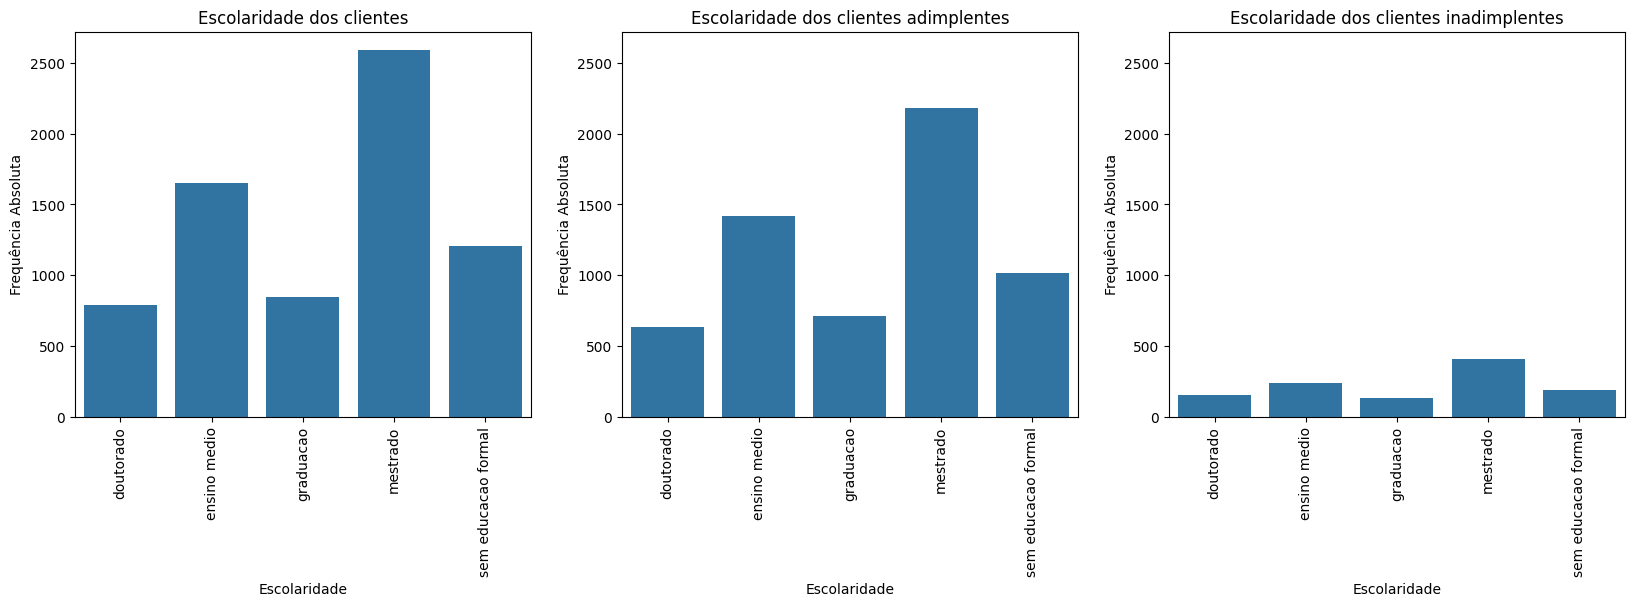

In [65]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos clientes', 'Escolaridade dos clientes adimplentes', 'Escolaridade dos clientes inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq']*1.1

figura, eixos = plt.subplots(1,3, figsize=(20,5), sharex = True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
    f = sns.barplot(x = coluna, y = 'frequencia_absoluta', data = df_to_plot, ax = eixos[eixo])
    f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absoluta')
    f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)
    
    _ , max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    
for eixo in eixos:
  eixo.set(ylim = (0, max_y))
        
plt.show()
    

C:\Users\hfasa\AppData\Local\Temp\ipykernel_18900\1975033884.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)
C:\Users\hfasa\AppData\Local\Temp\ipykernel_18900\1975033884.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)
C:\Users\hfasa\AppData\Local\Temp\ipykernel_18900\1975033884.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)


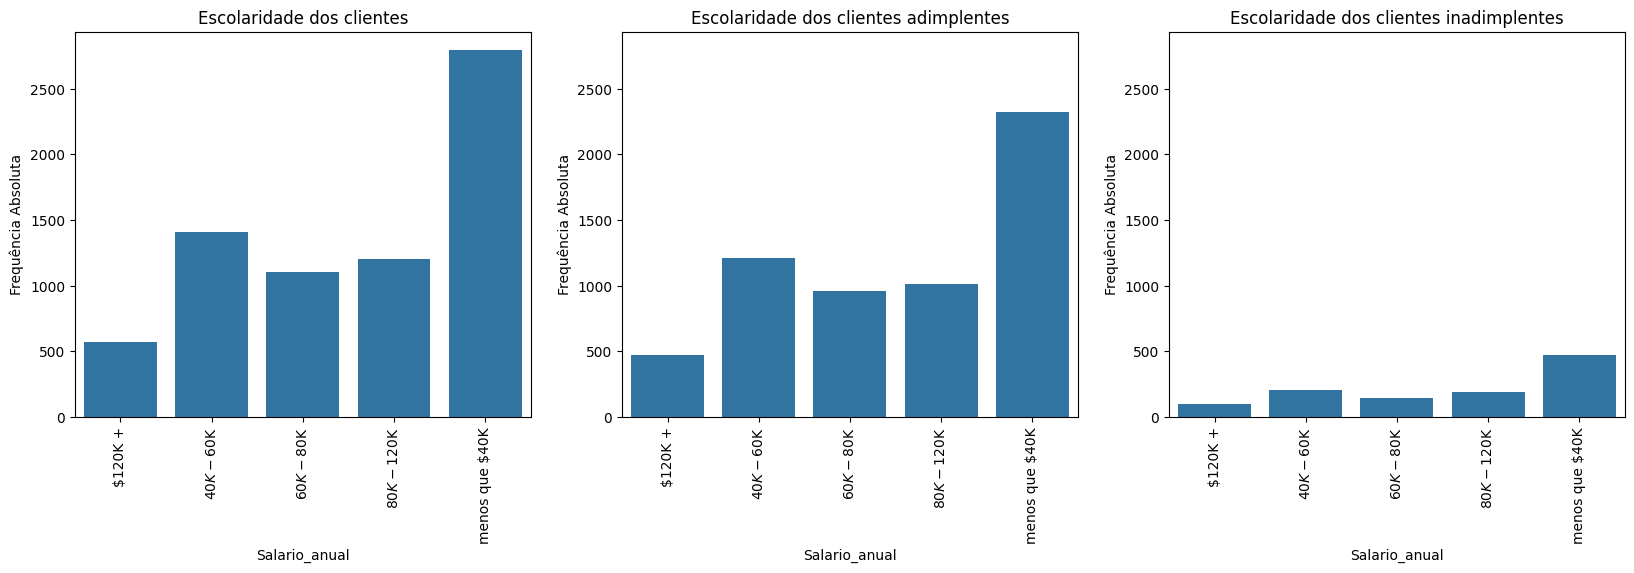

In [66]:
coluna = 'salario_anual'
titulos = ['Escolaridade dos clientes', 'Escolaridade dos clientes adimplentes', 'Escolaridade dos clientes inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq']*1.1

figura, eixos = plt.subplots(1,3, figsize=(20,5), sharex = True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
    f = sns.barplot(x = coluna, y = 'frequencia_absoluta', data = df_to_plot, ax = eixos[eixo])
    f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absoluta')
    f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)
    
    _ , max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    
for eixo in eixos:
  eixo.set(ylim = (0, max_y))
        
plt.show()

C:\Users\hfasa\AppData\Local\Temp\ipykernel_18900\2465060108.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)
C:\Users\hfasa\AppData\Local\Temp\ipykernel_18900\2465060108.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)
C:\Users\hfasa\AppData\Local\Temp\ipykernel_18900\2465060108.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)


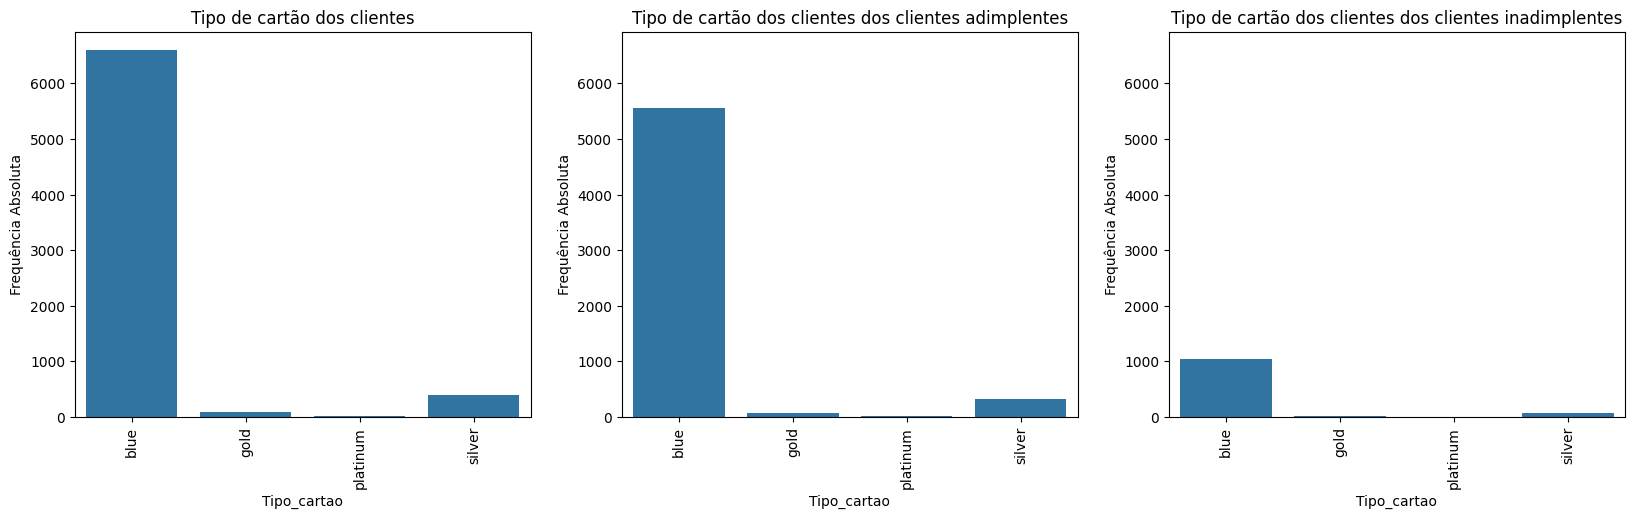

In [67]:
coluna = 'tipo_cartao'
titulos = ['Tipo de cartão dos clientes', 'Tipo de cartão dos clientes dos clientes adimplentes', 'Tipo de cartão dos clientes dos clientes inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq']*1.1

figura, eixos = plt.subplots(1,3, figsize=(20,5), sharex = True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
    f = sns.barplot(x = coluna, y = 'frequencia_absoluta', data = df_to_plot, ax = eixos[eixo])
    f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absoluta')
    f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)
    
    _ , max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    
for eixo in eixos:
  eixo.set(ylim = (0, max_y))
        
plt.show()

C:\Users\hfasa\AppData\Local\Temp\ipykernel_18900\3869935862.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)
C:\Users\hfasa\AppData\Local\Temp\ipykernel_18900\3869935862.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)
C:\Users\hfasa\AppData\Local\Temp\ipykernel_18900\3869935862.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)


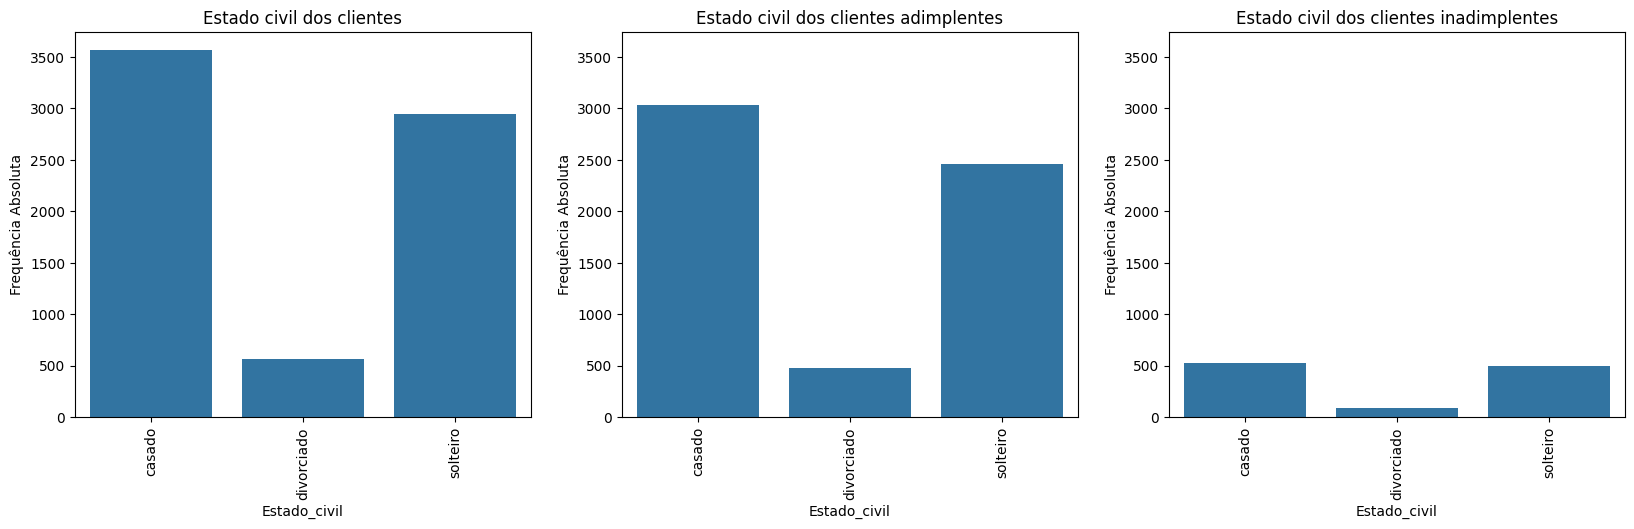

In [68]:
coluna = 'estado_civil'
titulos = ['Estado civil dos clientes', 'Estado civil dos clientes adimplentes', 'Estado civil dos clientes inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq']*1.1

figura, eixos = plt.subplots(1,3, figsize=(20,5), sharex = True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
    f = sns.barplot(x = coluna, y = 'frequencia_absoluta', data = df_to_plot, ax = eixos[eixo])
    f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absoluta')
    f.set_xticklabels(labels= f.get_xticklabels(), rotation = 90)
    
    _ , max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    
for eixo in eixos:
  eixo.set(ylim = (0, max_y))
        
plt.show()

A taxa de inadimplência para solteiros e casados se equiparam, enquanto a relação entre solteiros e casados possuem uma notável diferença na taxa de adimplência  

### Dados Numéricos

In [70]:
df.drop(['id', 'default'] , axis = 1).select_dtypes('number').head(n = 5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


#### Histograma

In [ ]:
coluna = 'idade'
titulos = ['idade dos clientes', 'idade dos clientes adimplentes', 'idade dos clientes inadimplentes']

eixo = 0
max_y = 0